In [1]:
import pandas as pd

In [2]:
samsung_ms = pd.read_csv('Amazon_5weeks.csv')

In [3]:
#데이터 타임으로 변경
samsung_ms['Date'] = pd.to_datetime(samsung_ms.loc[:,'Date'])

In [4]:
#두 컬럼만 불러오기
samsung_ms = samsung_ms[['Date', 'Product_name']]

In [5]:
# 데이트 뉴, 앞으로 설정
samsung_ms = samsung_ms.set_index('Date')

In [6]:
#띄어쓰기 별로 나누고 불러오기
samsung_ms['Product_name'] = samsung_ms['Product_name'].str.split(' ').str[:3]

In [7]:
#삼성제품만 불러오기
samsung_ms = samsung_ms[samsung_ms['Product_name'].str[0] == 'Samsung']

In [8]:
#제품 이름만 불러오기 
samsung_ms['Product_name'] = samsung_ms['Product_name'].str[2]

In [9]:
#제품 시리즈만 불러오기
samsung_ms['Product_name'] = samsung_ms['Product_name'].str[0]

In [10]:
#진짜 제품라인으로 이름 변경
samsung_ms['Product_name'] = samsung_ms['Product_name'].replace('A','A series')
samsung_ms['Product_name'] = samsung_ms['Product_name'].replace('J','J series')
samsung_ms['Product_name'] = samsung_ms['Product_name'].replace('M','M series')
samsung_ms['Product_name'] = samsung_ms['Product_name'].replace('O','ON series')
# samsung_ms['Name'] = samsung_ms['Name'].replace('P','ON series')
samsung_ms['Product_name'] = samsung_ms['Product_name'].replace('S','S series')


samsung_ms['Product_name'].head()

Date
2019-07-26    M series
2019-07-25    M series
2019-07-23    M series
2019-07-22    M series
2019-07-22    M series
Name: Product_name, dtype: object

In [11]:
#주차별로 멀티 인덱스 만들기
a_samsung_ms = samsung_ms.groupby(['Product_name','Date']).resample('w').count().unstack()
a_samsung_ms.head()

Product_name                                   \
Date                      2019-07-28 2019-08-04 2019-08-11 2019-08-18   
Product_name Date                                                       
A series     2019-07-22         15.0        NaN        NaN        NaN   
             2019-07-23         20.0        NaN        NaN        NaN   
             2019-07-24         20.0        NaN        NaN        NaN   
             2019-07-25         12.0        NaN        NaN        NaN   
             2019-07-26         22.0        NaN        NaN        NaN   

                                    
Date                    2019-08-25  
Product_name Date                   
A series     2019-07-22        NaN  
             2019-07-23        NaN  
             2019-07-24        NaN  
             2019-07-25        NaN  
             2019-07-26        NaN

In [12]:
#결측값 = 0 처리
a_samsung_ms = a_samsung_ms.fillna(0)
a_samsung_ms.head()

Product_name                                   \
Date                      2019-07-28 2019-08-04 2019-08-11 2019-08-18   
Product_name Date                                                       
A series     2019-07-22         15.0        0.0        0.0        0.0   
             2019-07-23         20.0        0.0        0.0        0.0   
             2019-07-24         20.0        0.0        0.0        0.0   
             2019-07-25         12.0        0.0        0.0        0.0   
             2019-07-26         22.0        0.0        0.0        0.0   

                                    
Date                    2019-08-25  
Product_name Date                   
A series     2019-07-22        0.0  
             2019-07-23        0.0  
             2019-07-24        0.0  
             2019-07-25        0.0  
             2019-07-26        0.0

In [13]:
#데이트 뉴 행으로 정렬하기 
a_samsung_ms1 = a_samsung_ms.sum(axis=1, level = 'Date')

In [14]:
#주+벤더별 정렬하기
a_samsung_ms2 = a_samsung_ms1.sum(axis=0, level = 'Product_name')
a_samsung_ms2

Date,2019-07-28 00:00:00,2019-08-04 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-08-25 00:00:00
Product_name,,,,,
A series,110.0,99.0,47.0,84.0,104.0
M series,4740.0,3337.0,1062.0,1412.0,7318.0


In [15]:
# # 불필요한 칼럼 삭제
# a_samsung_ms2 = a_samsung_ms2.drop(a_samsung_ms2.columns[:3], axis='columns')
# a_samsung_ms2

In [16]:
# 칼럼명 변경
a_samsung_ms2.columns = ["Week30", "Week31", "Week32", "Week33", "Week34"]
a_samsung_ms2

,Week30,Week31,Week32,Week33,Week34
Product_name,,,,,
A series,110.0,99.0,47.0,84.0,104.0
M series,4740.0,3337.0,1062.0,1412.0,7318.0


In [17]:
#가중치 더해서 weight_sum하기
a_samsung_ms2["Week34"] = a_samsung_ms2["Week34"] * 0.95
a_samsung_ms2["Week33"] = a_samsung_ms2["Week33"] * 0.90
a_samsung_ms2["Week32"] = a_samsung_ms2["Week32"] * 0.85
a_samsung_ms2["Week31"] = a_samsung_ms2["Week31"] * 0.80
a_samsung_ms2["Week30"] = a_samsung_ms2["Week30"] * 0.75

a_samsung_ms2

,Week30,Week31,Week32,Week33,Week34
Product_name,,,,,
A series,82.5,79.2,39.95,75.6,98.8
M series,3555.0,2669.6,902.70,1270.8,6952.1


In [18]:
#칼럼명으로 오름차순 정렬

a_samsung_ms2 = a_samsung_ms2.sort_index(axis =1 , ascending = True)
a_samsung_ms2

,Week30,Week31,Week32,Week33,Week34
Product_name,,,,,
A series,82.5,79.2,39.95,75.6,98.8
M series,3555.0,2669.6,902.70,1270.8,6952.1


In [19]:
####################################################
#####주차별 가중치합 (기존의 Weight_sum과 달리, 2~4주차치만 뽑은 데이터!)

a_samsung_ms2['Weight_sum'] = a_samsung_ms2['Week34'] + a_samsung_ms2['Week33'] + a_samsung_ms2['Week32']+ a_samsung_ms2['Week31']+ a_samsung_ms2['Week30']
a_samsung_ms2

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Product_name,,,,,,
A series,82.5,79.2,39.95,75.6,98.8,376.05
M series,3555.0,2669.6,902.70,1270.8,6952.1,15350.20


In [20]:
#내림차순으로 정렬
a_samsung_ms2 = a_samsung_ms2.sort_values(["Weight_sum"], ascending=[False])
a_samsung_ms2

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Product_name,,,,,,
M series,3555.0,2669.6,902.70,1270.8,6952.1,15350.20
A series,82.5,79.2,39.95,75.6,98.8,376.05


In [21]:
#Weight_sum탈락시키기
a_samsung_ms2_review_count = a_samsung_ms2.drop(a_samsung_ms2.columns[-1:], axis='columns')
a_samsung_ms2_review_count

,Week30,Week31,Week32,Week33,Week34
Product_name,,,,,
M series,3555.0,2669.6,902.70,1270.8,6952.1
A series,82.5,79.2,39.95,75.6,98.8


In [22]:
# csv파일로 저장하기
data = pd.DataFrame(a_samsung_ms2)
data.to_csv('Amazon_line_weight_sum.csv')

In [23]:
#파이차트 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc

%matplotlib inline

In [24]:
#벤더 + weigh_sum만 불러오기
A_vendor_weigh3 = a_samsung_ms2[['Weight_sum']]
A_vendor_weigh3

,Weight_sum
Product_name,
M series,15350.20
A series,376.05


C:\Users\LES\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


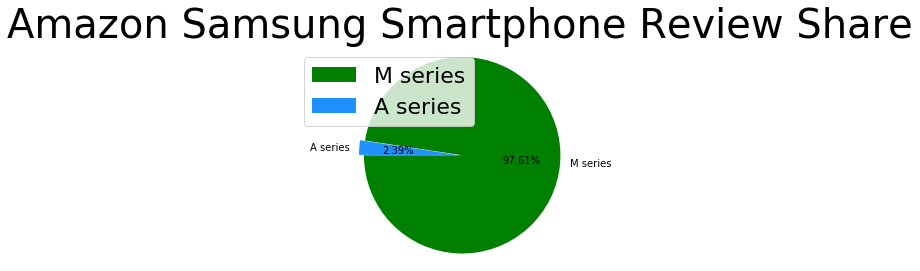

In [25]:
#파이차트 그리기
plt.pie(A_vendor_weigh3,
        explode = (0.05, 0),
        labels = ['M series','A series'],
        colors = ['green', 'dodgerblue'], 
        startangle = 180,
        autopct = '%1.2f%%')

plt.rcParams.update({'font.size': 25})
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis('equal', fontsize=18)
plt.title('Amazon Samsung Smartphone Review Share', fontsize = 40)       
plt.legend(fontsize=22,  loc='upper left')


plt.show()

In [26]:
#백분율 구하기 vendor_weigh_2
a_samsung_ms2_per = (a_samsung_ms2[0:] / a_samsung_ms2[0:].sum()) * 100
a_samsung_ms2_per

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Product_name,,,,,,
M series,97.731959,97.118743,95.761948,94.385027,98.59876,97.608775
A series,2.268041,2.881257,4.238052,5.614973,1.40124,2.391225


In [27]:
# csv파일로 저장하기 (주별 리뷰 점유율 percentage)
data1 = pd.DataFrame(a_samsung_ms2_per)
data1.to_csv('Weekly_Amazon_line_weight_sum_per.csv')

In [28]:
#행과 열을 바꾸기
a_samsung_ms2_per = np.transpose(a_samsung_ms2_per)
a_samsung_ms2_per.head()

Product_name,M series,A series
Week30,97.731959,2.268041
Week31,97.118743,2.881257
Week32,95.761948,4.238052
Week33,94.385027,5.614973
Week34,98.598760,1.401240


C:\Users\LES\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


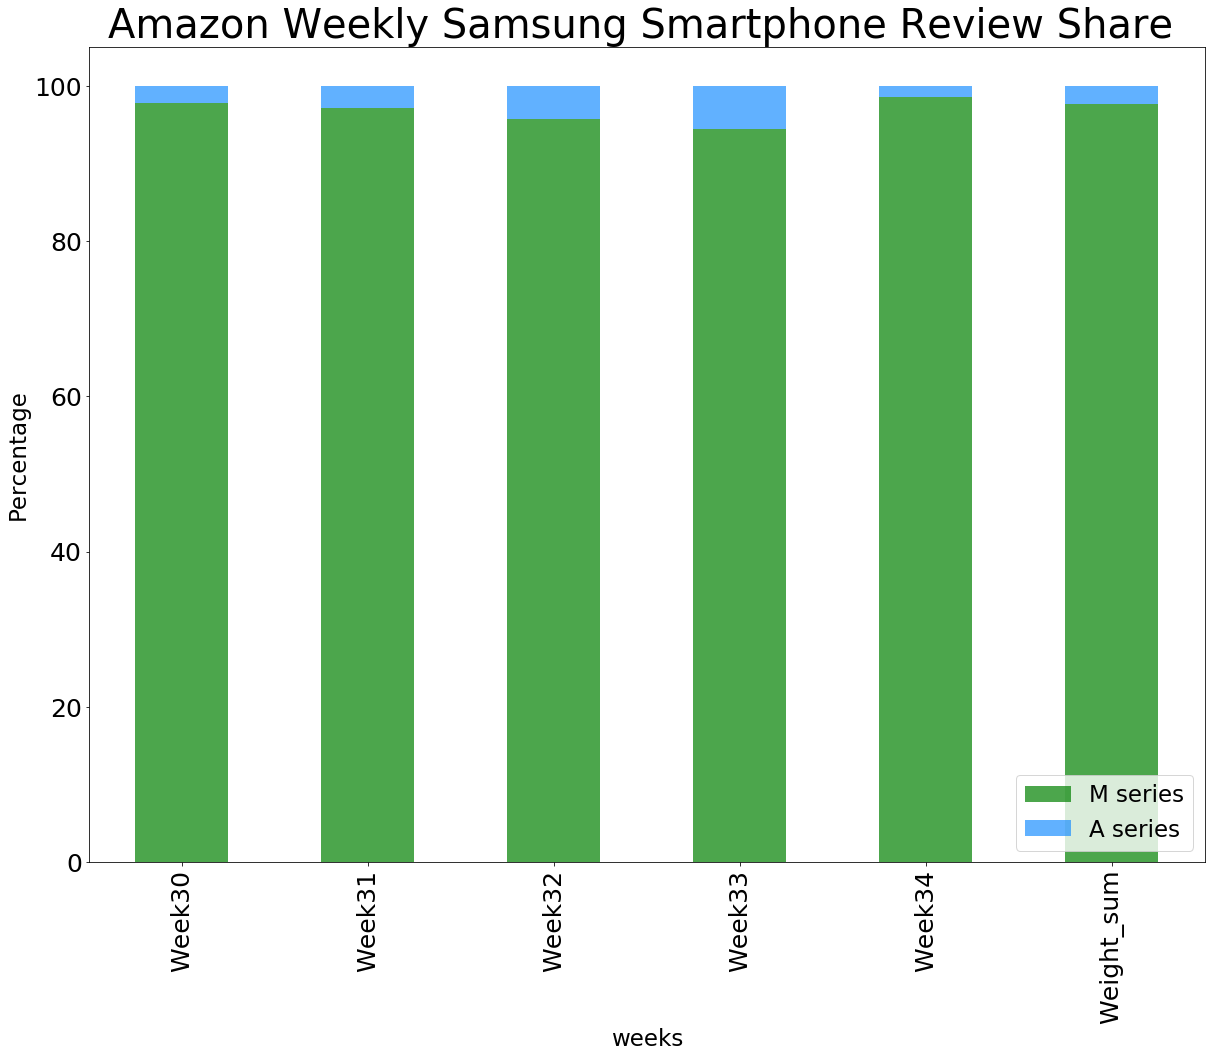

In [29]:
# 누적막대그래프 만들기
a_samsung_ms2_per.plot.bar(stacked=True, fontsize=25,
                          colors = ['green', 'dodgerblue'], alpha=0.7)

# Set the title and labels
plt.rcParams['figure.figsize'] = [15,13]
plt.legend(fontsize=23, loc = 'lower right')
plt.xlabel('weeks', fontsize=23)
plt.ylabel('Percentage', fontsize=23)
plt.title('Amazon Weekly Samsung Smartphone Review Share ', fontsize=40)


# show the plot
plt.show()

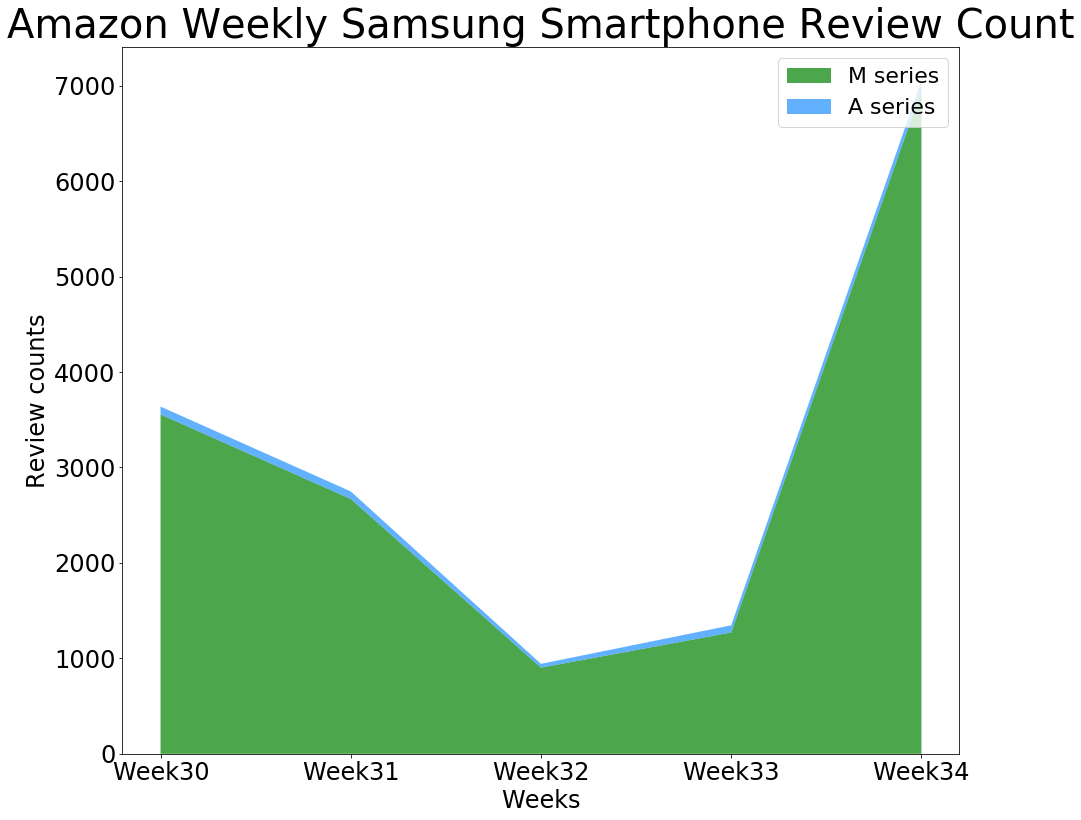

In [31]:
x=a_samsung_ms2_review_count.columns[0:]
y=a_samsung_ms2_review_count[0:]

pal = ['green', 'dodgerblue']
plt.stackplot(x,y, labels=['M series','A series'], 
              colors=pal, alpha=0.7 )

plt.title("Amazon Weekly Samsung Smartphone Review Count", fontsize=40, fontweight=0, color='black')
plt.xlabel("Weeks", fontsize = 24)
plt.xticks(fontsize = 24)

plt.ylabel("Review counts", fontsize = 24)
plt.yticks(fontsize = 24)

plt.legend(loc='upper right', fontsize = 22)
plt.show()
 